# Time Series Analysis using Facebook Prophet

![Namespace Labs](../../../../labs.png)

### Installation

pip install fbprophet

## Predict total rental bikes

In [1]:
from fbprophet import Prophet

import pandas as pd

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [4]:
df['ds'] = df['dteday']
df['y'] = df['cnt']

In [5]:
df = df[['ds','y']]

In [6]:
df.head()

,ds,y
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [7]:
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1091,2013-12-27
1092,2013-12-28
1093,2013-12-29
1094,2013-12-30
1095,2013-12-31


In [9]:
forecast = model.predict(future)

In [10]:
forecast.sample()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
382,2012-01-18,4680.506381,2278.882183,4662.527243,4680.506381,4680.506381,0.0,0.0,0.0,0.0,...,15.248227,15.248227,15.248227,-1196.64064,-1196.64064,-1196.64064,0.0,0.0,0.0,3499.113969


In [11]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1091,2013-12-27,5640.461969,4448.283901,6878.137281
1092,2013-12-28,5563.862193,4333.244714,6787.423421
1093,2013-12-29,5276.357299,3989.089779,6483.956250
1094,2013-12-30,5446.348546,4224.774480,6701.684004
1095,2013-12-31,5657.626423,4465.433306,6916.427832


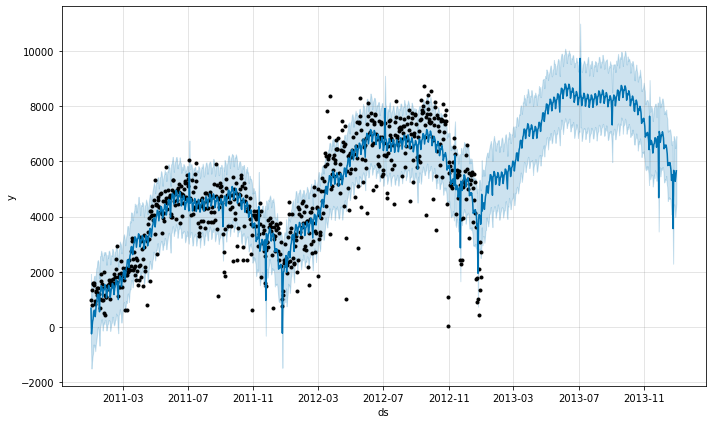

In [12]:
plot = model.plot(forecast)
# The blue line in the graph represents the predicted values while the black dots 
# represents the data in our dataset.

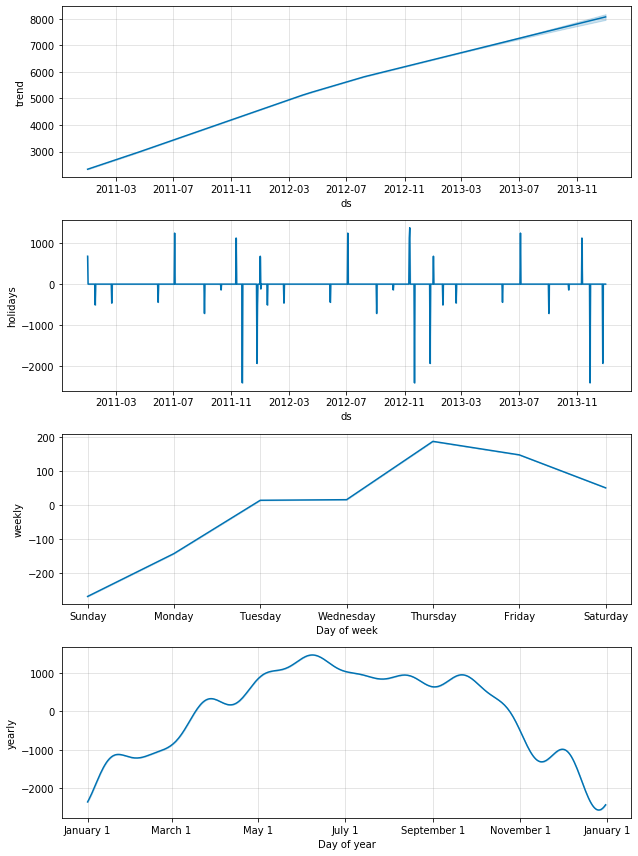

In [13]:
plot2 = model.plot_components(forecast)

### Time series cross validation to measure forecast error using historical data. 
1. Select a cut off points in the past 
2. Fit the model to the data up to that cut off point 
3. Compare the forecasted values to the actual values.

In [19]:
from fbprophet.diagnostics import cross_validation #measure forecast error using historical data
# This is done by selecting cutoff points in the history, and for each of them fitting the model using 
# data only up to that cutoff point. We can then compare the forecasted values to the actual values
df_cv = cross_validation(model,horizon = '50 days') #  forecast horizon
# By default, the initial training period is set to three times the horizon
# cutoffs are made every half a horizon
df_cv.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 2012-01-16 00:00:00 and 2012-11-11 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-01-17,2909.755846,1980.976798,3751.294914,2935,2012-01-16
1,2012-01-18,2660.199726,1809.595891,3505.010340,3376,2012-01-16
2,2012-01-19,2824.187075,1961.261874,3681.477268,3292,2012-01-16
3,2012-01-20,2912.660673,2069.990319,3796.156322,3163,2012-01-16
4,2012-01-21,2828.965123,1964.883502,3672.231975,1301,2012-01-16


In [20]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
41,46 days,2.454472e+06,1566.675521,1153.804018,0.486341,0.138866,0.600000
42,47 days,2.401661e+06,1549.729211,1152.522792,0.529038,0.137122,0.615385
43,48 days,2.619476e+06,1618.479390,1218.690754,0.524277,0.137122,0.584615
44,49 days,2.492172e+06,1578.661497,1186.198841,0.489337,0.138241,0.553846
45,50 days,2.191768e+06,1480.461962,1127.488423,0.332015,0.132674,0.569231


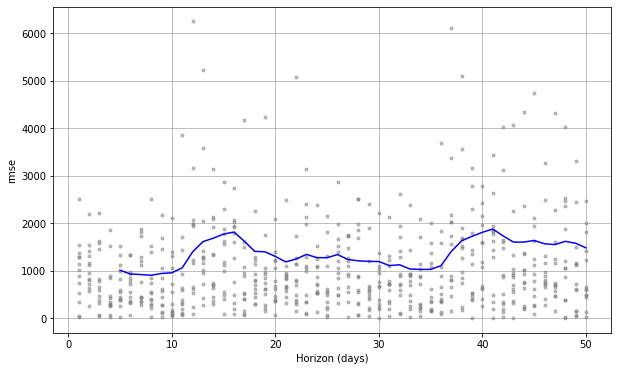

In [21]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

Happy Coding!